In [86]:
import numpy as np
import gym
from gym import wrappers
import seaborn as sns
import pandas as pd
import random
import time
import matplotlib.pyplot as plt

In [92]:
def run_episode(env, policy, gamma = 1.0, render = False):
    """ Evaluates policy by using it to run an episode and finding its
    total reward.

    args:
    env: gym environment.
    policy: the policy to be used.
    gamma: discount factor.
    render: boolean to turn rendering on/off.

    returns:
    total reward: real value of the total reward recieved by agent under policy.
    """
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    while True:
        if render:
            env.render()
        obs, reward, done , _ = env.step(int(policy[obs]))
        #total_reward += (gamma ** step_idx * reward)
        total_reward += (gamma * reward)
        step_idx += 1
        if done:
            print("number of steps:",step_idx)
            if(reward == 0):
               print("Fail")
            env.render()
            break
    return total_reward



In [93]:
def evaluate_policy(env, policy, gamma = 1.0,  n = 100):
    """ Evaluates a policy by running it n times.
    returns:
    average total reward
    """
    scores = [
            run_episode(env, policy, gamma = gamma, render = False)
            for _ in range(n)]
    return scores

Value-iteration converged at iteration# 2357.
[1. 2. 2. 1. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 2. 0. 0. 0. 0. 2. 3. 3. 2.
 0. 0. 0. 1. 0. 0. 2. 2. 0. 3. 0. 0. 2. 1. 3. 2. 0. 0. 0. 1. 3. 0. 0. 2.
 0. 0. 1. 0. 0. 0. 0. 2. 0. 1. 0. 0. 1. 2. 1. 0.]
number of steps: 133
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
number of steps: 98
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
number of steps: 200
Fail
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
number of steps: 173
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
number of steps: 135
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
number of steps: 101
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
number of steps: 64
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
number of steps: 90
  (Right)
SFFF

number of steps: 200
Fail
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
number of steps: 81
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
number of steps: 128
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
number of steps: 76
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
number of steps: 159
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
number of steps: 125
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
number of steps: 50
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
number of steps: 168
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
number of steps: 117
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
number of steps: 160
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFH

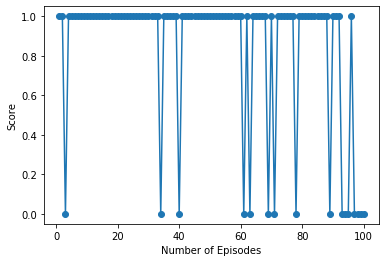

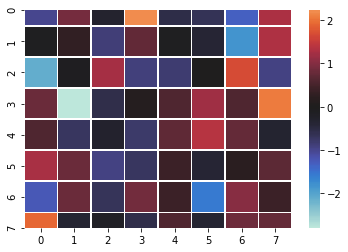

In [117]:
def extract_policy_v(v, gamma = 1.0):
    """ Extract the policy given a value-function """
    policy = np.zeros(env.nS)
    for s in range(env.nS):
        q_sa = np.zeros(env.action_space.n)
        for a in range(env.action_space.n):
            for next_sr in env.P[s][a]:
                # next_sr is a tuple of (probability, next state, reward, done)
                p, s_, r, _ = next_sr
                q_sa[a] += (p * (r + gamma * v[s_]))
        policy[s] = np.argmax(q_sa)
    return policy


def value_iteration(env, gamma = 1.0):
    """ Value-iteration algorithm """
    v = np.zeros(env.nS)  # initialize value-function
    max_iterations = 100000
    eps = 1e-100
    #eps =1
    for i in range(max_iterations):        
        prev_v = np.copy(v)
        for s in range(env.nS):
            q_sa = [sum([p*(r + prev_v[s_]) for p, s_, r, _ in env.P[s][a]]) for a in range(env.nA)] 
            v[s] = max(q_sa)
        if (np.sum(np.fabs(prev_v - v)) <= eps):
            print ('Value-iteration converged at iteration# %d.' %(i+1))
            break
    return v


if __name__ == '__main__':
    env_name  = 'FrozenLake8x8-v0'
    gamma = 1.0
    #env = gym.make(env_name)
    #optimal_v = value_iteration(env, gamma);
    #policy = extract_policy(optimal_v, gamma)
    #policy_score = evaluate_policy(env, policy, gamma, n=1000)
    #print('Policy average score = ', policy_score)
    
   # env_name  = 'FrozenLake-v0'
   # gamma = 1.0 
   # custom_map = [
    #'SFFHF',
    #'HFHFF',
    #'HFFFH',
    #'HHHFH',
    #'HFFFG'
    #]
    env = gym.make(env_name)
    #env.render()
    #print(env.P)
    optimal_v = value_iteration(env, gamma);
    policy = extract_policy_v(optimal_v, gamma)
    print(policy)
    policy_score = evaluate_policy(env, policy, gamma, n=100)
    print(policy_score)
    print('Policy average score = ', np.mean(policy_score))
    env.render()
    print(type(policy))
    plt.plot(range(1,101), policy_score, marker='o')
    plt.xlabel('Number of Episodes')
    plt.ylabel('Score')
    plt.show()
    
    df = pd.DataFrame(data=range(0,64))
    df["State"] =  pd.DataFrame(data=range(0,64))
    df = np.random.randn(8, 8)
    sns.heatmap(df,center =0,linewidths=.5)
    

Compute-Policy value converged at step 22.
Compute-Policy value converged at step 61.
Compute-Policy value converged at step 1460.
Compute-Policy value converged at step 1491.
Compute-Policy value converged at step 1498.
Compute-Policy value converged at step 1509.
Compute-Policy value converged at step 1531.
Compute-Policy value converged at step 1562.
Compute-Policy value converged at step 1578.
Compute-Policy value converged at step 1579.
Compute-Policy value converged at step 1590.
Compute-Policy value converged at step 1616.
Policy-Iteration converged at step 12.
[3. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 2. 0. 0. 0. 0. 2. 3. 3. 2.
 0. 0. 0. 1. 0. 0. 2. 2. 0. 3. 0. 0. 2. 1. 3. 2. 0. 0. 0. 1. 3. 0. 0. 2.
 0. 0. 1. 0. 0. 0. 0. 2. 0. 1. 0. 0. 1. 2. 1. 0.]
number of steps: 79
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
number of steps: 200
Fail
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
number of steps: 11

number of steps: 103
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
number of steps: 126
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
number of steps: 140
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
number of steps: 105
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
number of steps: 153
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
number of steps: 79
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
number of steps: 94
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
number of steps: 55
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
number of steps: 175
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
number of steps: 111
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF


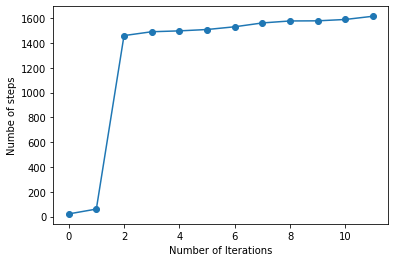

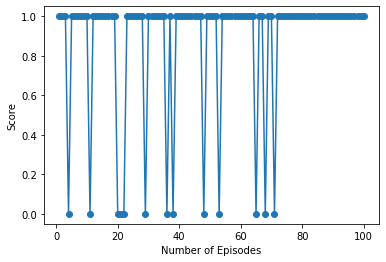

In [99]:
valuestep =[]
maxiteration =[]

def extract_policy_p(v, gamma = 1.0):
    """ Extract the policy given a value-function """
    policy = np.zeros(env.nS)
    for s in range(env.nS):
        q_sa = np.zeros(env.nA)
        for a in range(env.nA):
            q_sa[a] = sum([p * (r + gamma * v[s_]) for p, s_, r, _ in  env.P[s][a]])
        policy[s] = np.argmax(q_sa)
    return policy
def compute_policy_p(env, policy, gamma=1.0):
    """ Iteratively evaluate the value-function under policy.
    Alternatively, we could formulate a set of linear equations in iterms of v[s] 
    and solve them to find the value function.
    """
    v = np.zeros(env.nS)
    eps = 1e-10
    iter =0
    while True:
        prev_v = np.copy(v)
        iter = iter + 1
        for s in range(env.nS):
            policy_a = policy[s]
            v[s] = sum([p * (r + gamma * prev_v[s_]) for p, s_, r, _ in env.P[s][policy_a]])
        if (np.sum((np.fabs(prev_v - v))) <= eps):
            # value converged
            print ('Compute-Policy value converged at step %d.' %(iter))
            valuestep.append(iter)
            break
    return v

def policy_iteration(env, gamma = 1.0):
    """ Policy-Iteration algorithm """
    policy = np.random.choice(env.nA, size=(env.nS))  # initialize a random policy
    max_iterations = 2000
    
    for i in range(max_iterations):
        old_policy_v = compute_policy_p(env, policy, gamma)
        new_policy = extract_policy_p(old_policy_v, gamma)
        maxiteration.append(i)
        if (np.all(policy == new_policy)):
            print ('Policy-Iteration converged at step %d.' %(i+1))
            break
        policy = new_policy
    return policy


if __name__ == '__main__':
    env_name  = 'FrozenLake8x8-v0'
    env = gym.make(env_name)
    gamma =1.0
    optimal_policy = policy_iteration(env, gamma)
    print(optimal_policy)
    scores = evaluate_policy(env, optimal_policy, gamma,n=100)
    print(scores)
    print('Average scores = ', np.mean(scores))
    env.render()
    
    plt.plot(maxiteration, valuestep, marker='o')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Numbe of steps')
    plt.show()
    
    plt.plot(range(1,101), policy_score, marker='o')
    plt.xlabel('Number of Episodes')
    plt.ylabel('Score')
    plt.show()

In [64]:
env = gym.make('FrozenLake8x8-v0')

epsilon = 0.9
total_episodes = 10000
max_steps = 500

lr_rate = 0.81
gamma = 0.96

qtable = np.zeros((env.observation_space.n, env.action_space.n))
print(qtable)
    
def choose_action(state):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(qtable[state, :])
    return action

def learn(state, state2, reward, action):
    predict = qtable[state, action]
    target = reward + gamma * np.max(qtable[state2, :])
    qtable[state, action] = qtable[state, action] + lr_rate * (target - predict)

# Start
for episode in range(total_episodes):
    state = env.reset()
    t = 0
    
    while t < max_steps:
        #env.render()

        action = choose_action(state)  

        state2, reward, done, info = env.step(action)  

        learn(state, state2, reward, action)

        state = state2

        t += 1
       
        if done:
            break

       # time.sleep(0.1)

print(qtable)



for episode in range(100):
    state = env.reset()
    step = 0
    done = False
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(max_steps):
        
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(qtable[state,:])
        
        new_state, reward, done, info = env.step(action)
        
        if done:
            # Here, we decide to only print the last state (to see if our agent is on the goal or fall into an hole)
            env.render()
            if(reward == 0):
               print("Fail")
            else:
               print("Success")
            # We print the number of step it took.
            print("Number of steps", step)
            break
        state = new_state
env.close()


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[3.41368923e-01 3.37420024e-01 3.35865

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


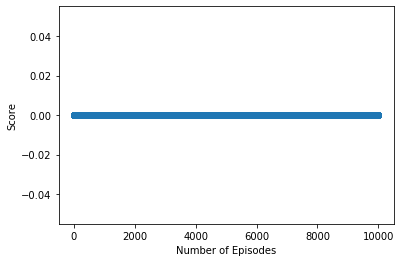

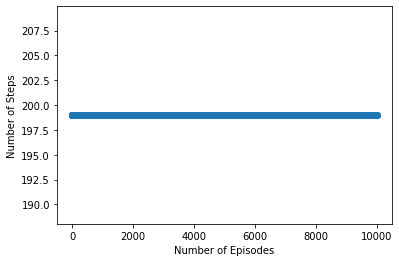

total episodes 10000
Score over time: 0.0
****************************************************
EPISODE  0
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
Number of steps 199
****************************************************
EPISODE  1
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
Number of steps 199
****************************************************
EPISODE  2
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
Number of steps 199
****************************************************
EPISODE  3
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
Number of steps 199
****************************************************
EPISODE  4
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
Number of steps 199
****************************************************
EPISODE  5
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHF

In [109]:
env = gym.make("FrozenLake8x8-v0")
action_size = env.action_space.n
state_size = env.observation_space.n
qtable = np.zeros((state_size, action_size))
print(qtable)

total_episodes = 10000        # Total episodes
learning_rate = 0.8           # Learning rate
max_steps = 299                # Max steps per episode
gamma = 0.95                  # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.005             # Exponential decay rate for exploration prob


# List of rewards
rewards = []
steps =[]
# 2 For life or until learning is stopped
for episode in range(total_episodes):
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    
    for step in range(max_steps):
        # 3. Choose an action a in the current world state (s)
        ## First we randomize a number
        exp_exp_tradeoff = random.uniform(0, 1)
        
        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])

        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample()
        action = np.argmax(qtable[state,:])
        #action = np.argmax(qtable[state,:])
        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        # qtable[new_state,:] : all the actions we can take from new state
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])
        
        total_rewards += reward
        
        # Our new state is state
        state = new_state
        
        # If done (if we're dead) : finish episode
        if done == True: 
            break
        
    # Reduce epsilon (because we need less and less exploration)
    steps.append(step)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) 
    rewards.append(total_rewards)

plt.plot(range(1,total_episodes+1), rewards, marker='o')
plt.xlabel('Number of Episodes')
plt.ylabel('Score')
plt.show()

plt.plot(range(1,total_episodes+1), steps, marker='o')
plt.xlabel('Number of Episodes')
plt.ylabel('Number of Steps')
plt.show()
#print("rewars",rewards)
print("total episodes",total_episodes)
print ("Score over time: " +  str(sum(rewards)/total_episodes))
#print(qtable)

env.reset()

for episode in range(50):
    state = env.reset()
    step = 0
    done = False
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(max_steps):
        
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(qtable[state,:])
        
        new_state, reward, done, info = env.step(action)
        
        if done:
            # Here, we decide to only print the last state (to see if our agent is on the goal or fall into an hole)
            env.render()
            
            # We print the number of step it took.
            print("Number of steps", step)
            break
        state = new_state
env.close()

In [8]:
import numpy as np

import gym
from gym import wrappers

n_states = 40
iter_max = 10000

initial_lr = 1.0 # Learning rate
min_lr = 0.003
gamma = 1.0
t_max = 10000
eps = 0.02

def run_episode(env, policy=None, render=False):
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    for _ in range(t_max):
        if render:
            env.render()
        if policy is None:
            action = env.action_space.sample()
        else:
            a,b = obs_to_state(env, obs)
            action = policy[a][b]
        obs, reward, done, _ = env.step(action)
        total_reward += gamma ** step_idx * reward
        step_idx += 1
        if done:
            break
    return total_reward

def obs_to_state(env, obs):
    """ Maps an observation to state """
    env_low = env.observation_space.low
    env_high = env.observation_space.high
    env_dx = (env_high - env_low) / n_states
    a = int((obs[0] - env_low[0])/env_dx[0])
    b = int((obs[1] - env_low[1])/env_dx[1])
    return a, b

if __name__ == '__main__':
    env_name = 'MountainCar-v0'
    #env_name ='FrozenLake8x8-v0'
    env = gym.make(env_name)
    env.seed(0)
    np.random.seed(0)
    print ('----- using Q Learning -----')
    q_table = np.zeros((n_states, n_states, 3))
    for i in range(iter_max):
        obs = env.reset()
        total_reward = 0
        ## eta: learning rate is decreased at each step
        eta = max(min_lr, initial_lr * (0.85 ** (i//100)))
        for j in range(t_max):
            a, b = obs_to_state(env, obs)
            if np.random.uniform(0, 1) < eps:
                action = np.random.choice(env.action_space.n)
            else:
                logits = q_table[a][b]
                logits_exp = np.exp(logits)
                probs = logits_exp / np.sum(logits_exp)
                action = np.random.choice(env.action_space.n, p=probs)
            obs, reward, done, _ = env.step(action)
            total_reward += (gamma ** j) * reward
            # update q table
            a_, b_ = obs_to_state(env, obs)
            q_table[a][b][action] = q_table[a][b][action] + eta * (reward + gamma *  np.max(q_table[a_][b_]) - q_table[a][b][action])
            if done:
                break
        if i % 100 == 0:
            print('Iteration #%d -- Total reward = %d.' %(i+1, total_reward))
    solution_policy = np.argmax(q_table, axis=2)
    solution_policy_scores = [run_episode(env, solution_policy, False) for _ in range(100)]
    print("Average score of solution = ", np.mean(solution_policy_scores))
    # Animate it
    #run_episode(env, solution_policy, True)

----- using Q Learning -----
Iteration #1 -- Total reward = -200.
Iteration #101 -- Total reward = -200.
Iteration #201 -- Total reward = -200.
Iteration #301 -- Total reward = -200.
Iteration #401 -- Total reward = -200.
Iteration #501 -- Total reward = -200.
Iteration #601 -- Total reward = -200.
Iteration #701 -- Total reward = -200.
Iteration #801 -- Total reward = -200.
Iteration #901 -- Total reward = -200.
Iteration #1001 -- Total reward = -200.
Iteration #1101 -- Total reward = -200.
Iteration #1201 -- Total reward = -200.
Iteration #1301 -- Total reward = -200.
Iteration #1401 -- Total reward = -200.
Iteration #1501 -- Total reward = -200.
Iteration #1601 -- Total reward = -200.
Iteration #1701 -- Total reward = -200.
Iteration #1801 -- Total reward = -200.
Iteration #1901 -- Total reward = -200.
Iteration #2001 -- Total reward = -200.
Iteration #2101 -- Total reward = -200.
Iteration #2201 -- Total reward = -200.
Iteration #2301 -- Total reward = -200.
Iteration #2401 -- Tota